# Regressão Logística com Python

# Qual é a diferença entre regressão linear e logística?

Embora a regressão linear seja adequada para estimar valores contínuos (por exemplo, estimar o preço da habitação), não é a melhor ferramenta para prever a classe de um ponto de dados observado. Para estimar a classe de um ponto de dados, precisamos de algum tipo de orientação sobre qual seria a <b> classe mais provável </b> para esse ponto de dados. Para isso, usamos <b>Regressão logística</b>.

Regressão logística é uma variação da regressão linear, útil quando a variável dependente observada, <b> y </b>, é categórica. Produz uma fórmula que prediz a probabilidade do rótulo da classe em função das variáveis independentes.

A regressão logística se ajusta a uma curva especial em forma de s, tomando a regressão linear e transformando a estimativa numérica em uma probabilidade com a seguinte função, denominada função sigmóide 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

Nesta equação, ${\theta^TX}$ é o resultado da regressão (a soma das variáveis ponderadas pelos coeficientes), `exp` é a função exponencial e $\sigma(\theta^TX)$ é o sigmóide ou [logistic function](http://en.wikipedia.org/wiki/Logistic_function), também chamado de curva logística. É uma forma comum de "S" (curva sigmóide).

Então, brevemente, a Regressão Logística passa a entrada pela logística / sigmóide, mas depois trata o resultado como uma probabilidade:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


O objetivo do algoritmo __Logistic Regression__ é encontrar os melhores parâmetros θ, para $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, de tal maneira que o modelo preveja melhor a classe de cada caso.

# Rotação do cliente com regressão logística

Rotação do cliente com regressão logística
Uma empresa de telecomunicações está preocupada com o número de clientes que abandonam seus negócios de telefonia fixa para concorrentes de cabo. Eles precisam entender quem está saindo. Imagine que você é analista nesta empresa e precisa descobrir quem está saindo e por quê.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

# Sobre o conjunto de dados
Usaremos um conjunto de dados de telecomunicações para prever a rotatividade de clientes. Este é um conjunto de dados histórico do cliente em que cada linha representa um cliente. Os dados são relativamente fáceis de entender e você pode descobrir informações que pode usar imediatamente. Normalmente, é mais barato manter os clientes do que adquirir novos, portanto, o foco desta análise é prever os clientes que permanecerão na empresa.


Esse conjunto de dados fornece informações para ajudá-lo a prever qual comportamento o ajudará a reter clientes. Você pode analisar todos os dados relevantes do cliente e desenvolver programas focados de retenção de clientes.



O conjunto de dados inclui informações sobre:

- Clientes que saíram no último mês - a coluna se chama Churn
- Serviços pelos quais cada cliente se inscreveu - telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes
- Informações da conta do cliente - há quanto tempo eles eram clientes, contrato, forma de pagamento, cobrança sem papel, cobranças mensais e cobranças totais
- Informações demográficas sobre clientes - sexo, faixa etária e se eles têm parceiros e dependentes


# Carregar os dados do Telecom Churn
O Telecom Churn é um arquivo de dados hipotéticos que diz respeito aos esforços de uma empresa de telecomunicações para reduzir a rotatividade de sua base de clientes. Cada caso corresponde a um cliente separado e registra várias informações demográficas e de uso de serviços. Antes de poder trabalhar com os dados, você deve usar a URL para obter o ChurnData.csv.

Para fazer o download dos dados, usaremos o `! Wget` para fazer o download no IBM Object Storage.

In [ ]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

# Carregar dados do arquivo CSV

In [2]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


# Análise de correlação das colunas

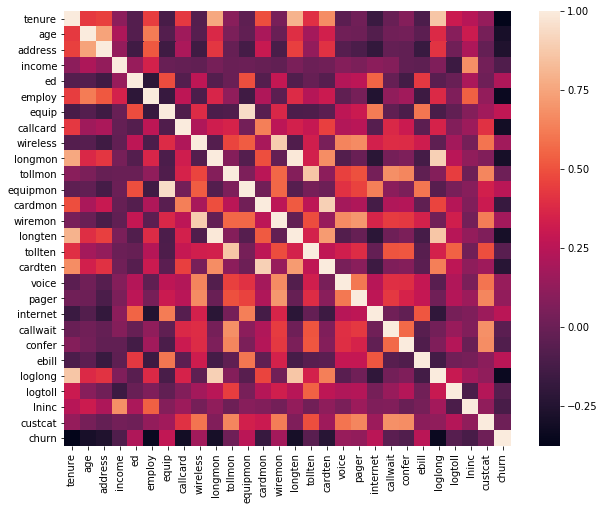

In [3]:
plt.figure(figsize=(10,8))
sns.heatmap(churn_df.corr());

In [4]:
churn_df.corr()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
tenure,1.000000,0.431802,0.456328,0.109383,-0.070503,0.445755,-0.117102,0.426530,-0.070590,0.763134,...,0.018791,-0.164921,-0.009747,0.080650,-0.099128,0.864388,0.310045,0.246353,0.134237,-0.376860
age,0.431802,1.000000,0.746566,0.211275,-0.071509,0.622553,-0.071357,0.170404,-0.065527,0.373547,...,0.006803,-0.078395,0.020002,0.030625,-0.048279,0.379413,0.093600,0.313359,0.041055,-0.287697
address,0.456328,0.746566,1.000000,0.132807,-0.145550,0.520926,-0.148977,0.209204,-0.146478,0.421782,...,-0.105812,-0.191058,-0.019967,-0.030494,-0.172171,0.409357,0.018386,0.212929,-0.016841,-0.260659
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,-0.010741,-0.019969,-0.029635,0.041808,...,0.056977,0.102809,0.081133,-0.031556,-0.041392,0.065595,-0.156498,0.680313,0.030725,-0.090790
ed,-0.070503,-0.071509,-0.145550,0.141241,1.000000,-0.213886,0.488041,-0.071178,0.267670,-0.072735,...,0.258698,0.552996,-0.016247,-0.132215,0.427315,-0.054581,-0.007227,0.206718,0.013127,0.216112
employ,0.445755,0.622553,0.520926,0.345161,-0.213886,1.000000,-0.174470,0.266612,-0.101187,0.363386,...,0.038381,-0.250044,0.119708,0.173247,-0.151965,0.377186,0.068718,0.540052,0.131292,-0.337969
equip,-0.117102,-0.071357,-0.148977,-0.010741,0.488041,-0.174470,1.000000,-0.087051,0.386735,-0.097618,...,0.308633,0.623509,-0.034021,-0.103499,0.603133,-0.113065,-0.027882,0.083494,0.174955,0.275284
callcard,0.426530,0.170404,0.209204,-0.019969,-0.071178,0.266612,-0.087051,1.000000,0.220118,0.322514,...,0.251069,-0.067146,0.370878,0.311056,-0.045058,0.351030,0.080060,0.156920,0.407553,-0.311451
wireless,-0.070590,-0.065527,-0.146478,-0.029635,0.267670,-0.101187,0.386735,0.220118,1.000000,-0.073043,...,0.667535,0.343631,0.389670,0.382925,0.321433,-0.042637,0.178317,0.033558,0.598156,0.174356
longmon,0.763134,0.373547,0.421782,0.041808,-0.072735,0.363386,-0.097618,0.322514,-0.073043,1.000000,...,-0.001372,-0.223929,0.032913,0.060614,-0.124605,0.901631,0.247302,0.122550,0.072519,-0.292026


# Pré-processamento e seleção de dados
Vamos selecionar alguns recursos para a modelagem. Também alteramos o tipo de dados de destino para inteiro, pois é um requisito do algoritmo sklearn:

In [5]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [6]:
print(churn_df.shape)

(200, 10)


Vamos definir X e y para o nosso conjunto de dados:

In [7]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [8]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

# Normalizando o conjunto de dados

In [9]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

Conjunto de dados de treino / teste

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


# Modelo (Regressão Logística com Scikit-learn)

Vamos construir nosso modelo usando LogisticRegression do pacote Scikit-learn. Essa função implementa regressão logística e pode usar diferentes otimizadores numéricos para encontrar parâmetros, incluindo os solucionadores de problemas de 'newton-cg', 'lbfgs', 'liblinear', 'saglin', 'sag' e 'saga'. Você pode encontrar informações abrangentes sobre os prós e contras desses otimizadores, se pesquisar na internet.

A versão da regressão logística no Scikit-learn suporta a regularização. A regularização é uma técnica usada para resolver o problema de sobreajuste nos modelos de aprendizado de máquina. O parâmetro C indica o inverso da força de regularização, que deve ser uma flutuação positiva. Valores menores especificam uma regularização mais forte. Agora vamos ajustar nosso modelo com o conjunto de trem:

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear', fit_intercept=True,).fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Agora podemos prever usando nosso conjunto de testes:

In [12]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [13]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

# Avaliação

jaccard index

Vamos tentar o jaccard index para avaliação da precisão. podemos definir jaccard como o tamanho da interseção dividido pelo tamanho da união de dois conjuntos de etiquetas. Se o conjunto inteiro de rótulos previstos para uma amostra corresponder estritamente ao verdadeiro conjunto de rótulos, a precisão do subconjunto será 1,0; caso contrário, é 0,0.

In [14]:
from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test, yhat)

0.75

# Matriz de Confusão

Outra maneira de analisar a precisão do classificador é examinar a matriz de confusão.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


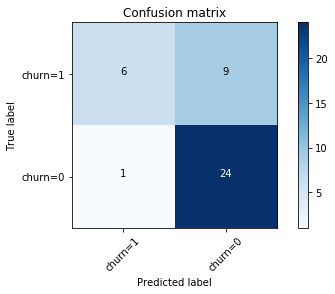

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Olhe para a primeira linha. A primeira linha é para clientes cujo valor real de rotatividade no conjunto de testes é 1. Como você pode calcular, de 40 clientes, o valor de rotatividade de 15 deles é 1. E desses 15, o classificador previu corretamente 6 deles como 1 e 9 deles como 0.

Isso significa que, para 6 clientes, o valor real de rotatividade era 1 no conjunto de testes e o classificador também previu corretamente como 1. No entanto, enquanto o rótulo real de 9 clientes era 1, o classificador previu como 0, o que não é muito bom. . Podemos considerá-lo como erro do modelo para a primeira linha.

E os clientes com valor de rotatividade 0? Vamos olhar para a segunda linha. Parece que havia 25 clientes cujo valor de rotatividade era 0.

O classificador previu corretamente 24 deles como 0 e um deles incorretamente como 1. Portanto, ele fez um bom trabalho ao prever os clientes com o valor de rotatividade 0. Uma coisa boa sobre a matriz de confusão é que mostra a capacidade do modelo de prever corretamente ou separar as classes. Em casos específicos de classificador binário, como este exemplo, podemos interpretar esses números como a contagem de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

In [17]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

   micro avg       0.75      0.75      0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Com base na contagem de cada seção, podemos calcular a precisão e o recall de cada rótulo:

Precisão é uma medida da precisão, desde que um rótulo de classe tenha sido previsto. É definido por: precision = TP / (TP + FP)

Lembre-se é verdadeira taxa positiva. É definido como: Recall = TP / (TP + FN)

Assim, podemos calcular a precisão e o recall de cada classe.

Pontuação F1: Agora estamos em posição de calcular as pontuações F1 para cada etiqueta com base na precisão e Recall dessa etiqueta.

A pontuação F1 é a média harmônica da precisão e recuperação, onde uma pontuação F1 atinge seu melhor valor em 1 (precisão e recuperação perfeitas) e pior em 0. É uma boa maneira de mostrar que um classificador tem um bom valor para ambos. recall e precisão.

E, finalmente, podemos dizer que a precisão média desse classificador é a média da pontuação F1 de ambos os rótulos, que é 0,72 no nosso caso.

# Perda de log

Agora, vamos tentar a perda de log para avaliação. Na regressão logística, o resultado pode ser que a probabilidade de rotatividade do cliente seja sim (ou igual a 1). Essa probabilidade é um valor entre 0 e 1. A perda de log (perda logarítmica) mede o desempenho de um classificador em que a saída prevista é um valor de probabilidade entre 0 e 1.

In [18]:
from sklearn.metrics import log_loss

log_loss(y_test, yhat_prob)

0.6017092478101187